In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/zoekearney/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [8]:
df_merged = pd.read_csv('/Users/zoekearney/Downloads/cenus_epa_climate_merged.csv')

In [3]:
df

,Unnamed: 0,NAME,pop_tot,pop_white_only,pop_black_only,pop_amInd_alNat_only,pop_asian_only,pop_natHI_PI_only,pop_white,pop_black,...,PS_PNPL,PS_PRMP,PS_PTSDF,PS_UST,PS_PWDIS,temp_labor_1 deg,temp_labor_2 deg,temp_labor_3 deg,temp_labor_4 deg,temp_labor_5 deg
0,1001020100,"Census Tract 201, Autauga County, Alabama",1791.0,1502.0,171.0,0.0,38.0,0.0,1582.0,199.0,...,79,32,23,32,87.0,11.801866,26.030747,39.215973,52.425672,63.559917
1,1001020200,"Census Tract 202, Autauga County, Alabama",2010.0,785.0,1088.0,0.0,0.0,0.0,882.0,1175.0,...,81,35,25,72,88.0,11.801866,26.030747,39.215973,52.425672,63.559917
2,1001020300,"Census Tract 203, Autauga County, Alabama",3577.0,2433.0,983.0,0.0,26.0,0.0,2457.0,1105.0,...,82,35,27,69,48.0,11.801866,26.030747,39.215973,52.425672,63.559917
3,1001020400,"Census Tract 204, Autauga County, Alabama",3802.0,3410.0,251.0,18.0,14.0,0.0,3519.0,268.0,...,86,38,31,79,18.0,11.801866,26.030747,39.215973,52.425672,63.559917
4,1001020600,"Census Tract 206, Autauga County, Alabama",3858.0,2765.0,840.0,0.0,71.0,0.0,2872.0,902.0,...,86,46,29,69,92.0,11.801866,26.030747,39.215973,52.425672,63.559917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60962,56043000200,"Census Tract 2, Washakie County, Wyoming",3249.0,2939.0,1.0,13.0,31.0,0.0,2993.0,7.0,...,30,53,18,15,94.0,5.015080,13.004330,19.879069,33.116379,42.681598
60963,56043000301,"Census Tract 3.01, Washakie County, Wyoming",2208.0,1764.0,0.0,35.0,0.0,0.0,1987.0,47.0,...,31,64,21,96,96.0,3.483128,11.804527,18.827176,32.561037,42.184988
60964,56043000302,"Census Tract 3.02, Washakie County, Wyoming",2311.0,1952.0,0.0,23.0,0.0,0.0,2114.0,0.0,...,32,71,20,71,95.0,3.483128,11.804527,18.827176,32.561037,42.184988
60965,56045951100,"Census Tract 9511, Weston County, Wyoming",3466.0,2960.0,25.0,39.0,37.0,3.0,3350.0,103.0,...,73,52,58,6,31.0,5.329467,12.574691,19.581603,33.458927,40.974731


In [24]:
for i in df.columns: 
    print(i)

Unnamed: 0
NAME
pop_tot
pop_white_only
pop_black_only
pop_amInd_alNat_only
pop_asian_only
pop_natHI_PI_only
pop_white
pop_black
pop_amInd_alNat
pop_asian
pop_natHI_PI
pop_hispanic_latino_any
poverty_tot_white_only
poverty_tot_black_only
poverty_tot_amInd_alNat_only
poverty_tot_asian_only
poverty_tot_natHI_PI_only
poverty_tot_hispanic_latino_any
poverty_below_white_only
poverty_below_black_only
poverty_below_amInd_alNat_only
poverty_below_asian_only
poverty_below_natHI_PI_only
poverty_below_hispanic_latino_any
poverty_below_white_only.1
poverty_perc_black_only
poverty_perc_amInd_alNat_only
poverty_perc_asian_only
poverty_perc_natHI_PI_only
poverty_perc_hispanic_latino_any
industry_tot
industry_ag_for
industry_const
industry_manu
industry_wtrade
industry_rtrade
industry_transp
industry_info
industry_fin
industry_prof
industry_ed_hc
industry_arts_ent
industry_other
industry_pub_admin
income_tot
income_under10k
income_10to15k
income_15to25k
income_25to35k
income_35to50k
income_50to75k
inco

In [78]:
# Calculate the Theil Index 
def calc_theil(df, char_str):
    '''
    Calculates the generalized entropy index of given agents with an associated characteristic 
    
    Inputs: 
    df - data frame containing population and characteristic data
    char_str - string, characteristic wanting to be measured (income, race, etc)
    '''
    
    i = df[char_str]
    N = len(i)
    
    xi = df[char_str]
    mu = xi.mean()
    
    # calculate the Theil L index contributions which are more sensitive to changes in the lower end of the distribution than Theil T
    TL_contr = (1/N)*np.log(mu/xi)
    
    TL_contr[xi == 0] = -99
    
    df['theil_index_contribution_' + char_str] = TL_contr
    
    
    

In [ ]:
# # Calculate decomposed Theil Index 
# def calc_theil_decom(df, char_str):
#     '''
#     Calculates the generalized entropy index of given agents with an associated characteristic 
    
#     Inputs: 
#     df - data frame containing population and characteristic data
#     char_str - string, characteristic wanting to be measured (income, race, etc)
#     '''
    
#     i = df[char_str]
#     N = len(i)
    
#     si = 
    
#     xi = df[char_str]
#     mu = xi.mean()
    
#     # calculate the Theil L index contributions which are more sensitive to changes in the lower end of the distribution than Theil T
#     TL_contr = (1/N)*np.log(mu/xi)
    
#     TL_contr[xi == 0] = -99
    
#     df['theil_index_contribution_' + char_str] = TL_contr

In [80]:
calc_theil(df,'income_tot')

In [79]:
df= df.drop(columns=['theil_index_contribution_income_tot'])

In [81]:
df

,Unnamed: 0,NAME,pop_tot,pop_white_only,pop_black_only,pop_amInd_alNat_only,pop_asian_only,pop_natHI_PI_only,pop_white,pop_black,...,PS_PRMP,PS_PTSDF,PS_UST,PS_PWDIS,temp_labor_1 deg,temp_labor_2 deg,temp_labor_3 deg,temp_labor_4 deg,temp_labor_5 deg,theil_index_contribution_income_tot
0,1001020100,"Census Tract 201, Autauga County, Alabama",1791.0,1502.0,171.0,0.0,38.0,0.0,1582.0,199.0,...,32,23,32,87.0,11.801866,26.030747,39.215973,52.425672,63.559917,1.495867e-05
1,1001020200,"Census Tract 202, Autauga County, Alabama",2010.0,785.0,1088.0,0.0,0.0,0.0,882.0,1175.0,...,35,25,72,88.0,11.801866,26.030747,39.215973,52.425672,63.559917,1.520288e-05
2,1001020300,"Census Tract 203, Autauga County, Alabama",3577.0,2433.0,983.0,0.0,26.0,0.0,2457.0,1105.0,...,35,27,69,48.0,11.801866,26.030747,39.215973,52.425672,63.559917,1.950418e-06
3,1001020400,"Census Tract 204, Autauga County, Alabama",3802.0,3410.0,251.0,18.0,14.0,0.0,3519.0,268.0,...,38,31,79,18.0,11.801866,26.030747,39.215973,52.425672,63.559917,-9.463847e-07
4,1001020600,"Census Tract 206, Autauga County, Alabama",3858.0,2765.0,840.0,0.0,71.0,0.0,2872.0,902.0,...,46,29,69,92.0,11.801866,26.030747,39.215973,52.425672,63.559917,2.158899e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60962,56043000200,"Census Tract 2, Washakie County, Wyoming",3249.0,2939.0,1.0,13.0,31.0,0.0,2993.0,7.0,...,53,18,15,94.0,5.015080,13.004330,19.879069,33.116379,42.681598,1.387450e-06
60963,56043000301,"Census Tract 3.01, Washakie County, Wyoming",2208.0,1764.0,0.0,35.0,0.0,0.0,1987.0,47.0,...,64,21,96,96.0,3.483128,11.804527,18.827176,32.561037,42.184988,8.049796e-06
60964,56043000302,"Census Tract 3.02, Washakie County, Wyoming",2311.0,1952.0,0.0,23.0,0.0,0.0,2114.0,0.0,...,71,20,71,95.0,3.483128,11.804527,18.827176,32.561037,42.184988,6.039514e-06
60965,56045951100,"Census Tract 9511, Weston County, Wyoming",3466.0,2960.0,25.0,39.0,37.0,3.0,3350.0,103.0,...,52,58,6,31.0,5.329467,12.574691,19.581603,33.458927,40.974731,1.142025e-06


In [82]:
tl = df['theil_index_contribution_income_tot']

In [84]:
tl.max()

0.00012012734196892156

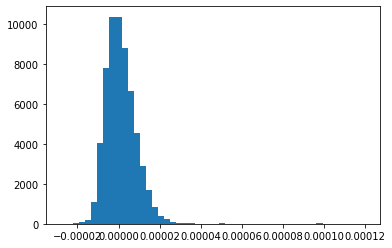

In [88]:
plt.hist(tl[tl>-90],bins=50)
plt.show()

In [89]:
tl[tl == tl.max()]

36043    0.00012
Name: theil_index_contribution_income_tot, dtype: float64

In [94]:
df.iloc[36043]

Unnamed: 0                                                              36003940200
NAME                                   Census Tract 9402, Allegany County, New York
pop_tot                                                                         2.0
pop_white_only                                                                  1.0
pop_black_only                                                                  0.0
                                                           ...                     
temp_labor_2 deg                                                           2.729024
temp_labor_3 deg                                                           7.067898
temp_labor_4 deg                                                          16.456032
temp_labor_5 deg                                                          23.165057
theil_index_contribution_income_tot                                         0.00012
Name: 36043, Length: 114, dtype: object